# 第01回 ガイダンス

この授業では毎回扱う機械学習の内容を実現するコードを紹介していきます。ここではPythonではなく、最近のプログラミング言語である「Julia」を使います。Juliaには不慣れな人が多いと思うので、今回はJuliaを簡単に紹介します。機械学習で用いる言語機能はそれほど複雑ではないので基本事項が抑えられていれば問題ありません。

# 自分でコードを実行しながら読むには？

まず最初に、この文書は単なるブログ記事ではなくて、「Jupyter notebook」という形式になっていて、灰色のかたまりに書いてあるプログラムコードをブラウザ上で実行することができます。

右上の「Remix」ボタンを押して、その後アカウント登録をすれば、このnotebookが自分専用のnotebookになり自分の好きに編集してコードの実行を試すことができます。アカウント登録ではプライベートなメールアドレスではなく大学のメールアドレスを使ってください。

コードが書いてある灰色のかたまりを「セル」と呼びます。セルに書いたコードを実行するには、「Shiftを押しながらReturn」を押します(Shift+Return)。いろいろと書き換えて実験してみてください。変数を用いた場合、実行した順に変数にメモリ領域が割り当てられて、次のセルを実行する際にそれを利用することができます。

In [1]:
1 + 2

3

ちなみにコードの実行はNextjournalのサーバで行われて、その結果がブラウザへ返されています。したがって、余りに重たいメモリを消費する計算はやめたほうが良いですが、一人ひとりへは少ないCPUやメモリ資源だけ割り当てられていてそれ以上使えないようになっているのでそれほど気をつける必要もありません。

![2020-04-27 13.03.47.png](https://nextjournal.com/data/QmU8GSJG6KoYYmXHCCSrkFcE6oVmRBq5nJjbWt7RvoBz7Z?content-type=image/png&node-id=ca5e658f-5606-4d71-842e-df1bb38dcc82&filename=2020-04-27+13.03.47.png&node-kind=file)

# Juliaの紹介

Juliaはラフに言えばPythonとMATLAB/FORTRANが混ざったような言語で、モダンな言語機能を持ちながら高速な行列演算も手軽に行うことができ、機械学習を含む科学技術計算に向いている言語です。

## 型 (type) 

Juliaには整数や浮動小数点、ストリングなどの型があります。typeof関数で型を確認することができます。それらを混ぜて実行することも可能で、その場合は適当な型へ自動的に変換されます。型を揃えたほうが基本的に演算は高速になります。

In [1]:
typeof(1)

Int64

In [1]:
typeof(1.0)

Float64

In [1]:
typeof("hello world")

String

In [1]:
1 + 1.0 #型を変換して計算

2.0

In [1]:
Float64(1) #型を明示的に変換

1.0

## 変数 (variable)

型を持った値(メモリの領域)を変数へ割り当てることができます。これは他の言語と同様です。

In [1]:
a = 1.0
b = 2.0

2.0

In [1]:
c = a + b

3.0

## 配列 (Array)

変数を要素に持つ配列を、1次元はもちろん多次元で持つことができます。1次元の配   列はベクトル、2次元の配列は行列として扱われ、行列演算も行うことができます。JuliaはMATLABと同じく1から始まるインデックスで配列の要素にアクセスします。 

In [1]:
a = [1, 2, 3, 4] #Int64型を要素に持つ1次元の配列=ベクトル

4-element Array{Int64,1}:
 1
 2
 3
 4

In [1]:
size(a) #xの要素数を取得

(4,)

In [1]:
a[1] #xの最初の要素へアクセス

1

In [1]:
a[2] #xの2番目の要素へアクセス

2

In [1]:
b = [1 2 3 4] #カンマを付けないと 1x4 の2次元配列になる
size(b)

(1, 4)

In [1]:
a + b # 配列のサイズが合わないとエラーになる

In [1]:
a = [1, 2, 3, 4]
c = [5, 6, 7, 8]
a + c

4-element Array{Int64,1}:
  6
  8
 10
 12

In [1]:
a * b #行列演算

4×4 Array{Int64,2}:
 1  2   3   4
 2  4   6   8
 3  6   9  12
 4  8  12  16

In [1]:
a .* c #ドットを付けると演算が要素ごとに実行させる。これをbroadcastと呼ぶ

4-element Array{Int64,1}:
  5
 12
 21
 32

In [1]:
A = [1 2; 3 4] #Int64型を要素に持つ2次元の配列=行列

2×2 Array{Int64,2}:
 1  2
 3  4

In [1]:
size(A)

(2, 2)

In [1]:
A[1, 1] #2つのインデックスで要素へアクセスする

1

In [1]:
B = [5 6; 7 8]

2×2 Array{Int64,2}:
 5  6
 7  8

In [1]:
A + B #行列の足し算

2×2 Array{Int64,2}:
  6   8
 10  12

In [1]:
A * B #行列の掛け算

2×2 Array{Int64,2}:
 19  22
 43  50

In [1]:
A .* B #要素毎の掛け算

2×2 Array{Int64,2}:
  5  12
 21  32

## 配列の作り方

様々な方法で手軽に配列を作ることができます。一番簡単なのはzeros関数で、これは配列のサイズを指定して全ての要素をゼロに初期化した配列を作ってくれます。

In [1]:
a = Array{Float64}(undef, 3) #何も要素を初期化せずに領域を確保するだけ

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [1]:
a = zeros(Float64, 3)　#要素をゼロで初期化してくれる

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [1]:
a = zeros(Int64, 3) #要素の型を整数(Int64)で作ることもできる

3-element Array{Int64,1}:
 0
 0
 0

In [1]:
a = rand(Float64, 3)

3-element Array{Float64,1}:
 0.289914
 0.884433
 0.281233

In [1]:
A = zeros(Float64, 3, 3) #2次元の配列=行列も作ることができる

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [1]:
a = 1:3 #厳密には配列ではないが、1,2,3をもつ配列のようなもの(UnitRange)

1:3

In [1]:
a = collect(1:3) #UnitRangeにcollect関数を適用すると配列になる

3-element Array{Int64,1}:
 1
 2
 3

In [1]:
t = range(1, stop=10, length=3) #同じくUnitRange 1から10を3つに区切って出力
collect(t)

3-element Array{Float64,1}:
  1.0
  5.5
 10.0

In [1]:
[x^2 for x in 1:3] #Pythonと同じ内包表記で配列を生成

3-element Array{Int64,1}:
 1
 4
 9

In [1]:
[x for x in 1:10 if x % 2 == 0] #内包表記の条件付きの例

5-element Array{Int64,1}:
  2
  4
  6
  8
 10

In [1]:
A = reshape(collect(1:10), 5, 2) #1次元で作成した配列を2次元へ変換

5×2 Array{Int64,2}:
 1   6
 2   7
 3   8
 4   9
 5  10

## 制御構文 (loop, condition)

ループ文や条件文などもPythonやMATLAB同様に書くことができます。

In [1]:
for i in 1:3
    println(i)
end

In [1]:
d = 0.0
for i in 1:10
    global d += 1.0 #普通はglobalは付けないが、今の場合、事情があって付けている
end
d

10.0

In [1]:
1 > 0

true

In [1]:
typeof(true)

Bool

In [1]:
1 < 0

false

In [1]:
if true
    println("hello world")
else 
  	println("hello julia")
end

## 算術演算 (arithmetics)

配列を用いて四則演算や、初等関数を含む様々な算術演算を行うことができます。

In [1]:
A = [1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [1]:
sum(A) #配列の全ての要素の和

21

In [1]:
sum(A, dims=1) #1次元方向(=行方向)の和

1×3 Array{Int64,2}:
 5  7  9

In [1]:
sum(A, dims=2) #2次元方向(=列方向)の和

2×1 Array{Int64,2}:
  6
 15

In [1]:
sin(pi) #初等関数

1.22465e-16

In [1]:
sin.(A) #要素に適用するにはドットが必要

2×3 Array{Float64,2}:
  0.841471   0.909297   0.14112 
 -0.756802  -0.958924  -0.279415

In [1]:
#点aとbの間のユークリッド距離を求める
a = [1, 2, 3]
b = [4, 5, 6]
sqrt(sum((a .- b).^2))

5.19615

In [1]:
#行列の固有値を求める
using LinearAlgebra #Juliaの標準ライブラリである線形代数ライブラリを読み込む
F = eigen([1.0 0.0 0.0; 0.0 3.0 0.0; 0.0 0.0 18.0])

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
  1.0
  3.0
 18.0
eigenvectors:
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

## 関数 (function)

PythonやMATLABと同様に関数を定義することができます。一度定義してしまえば大体は引数どのような型でも期待通りの計算をしてくれますが、引数が数値なのか配列なのかは注意する必要があります。

In [1]:
function mysum(x)
  x + 1
end

mysum (generic function with 1 method)

In [1]:
mysum(1)

2

In [1]:
mysum(1.0)

2.0

In [1]:
mysum([1, 2, 3])

In [1]:
function mysum2(y)
  y .+ 1
end

mysum2 (generic function with 1 method)

In [1]:
mysum2([1, 2, 3])

3-element Array{Int64,1}:
 2
 3
 4

In [1]:
mysum.([1, 2, 3])

3-element Array{Int64,1}:
 2
 3
 4

In [1]:
map(mysum, [1, 2, 3])

3-element Array{Int64,1}:
 2
 3
 4

# データの可視化

Juliaでは様々な可視化ライブラリが用意されていますが、ここでは機械学習で用いる基本的なプロットを行うためのPlotsというライブラリの使用例を示します。

In [1]:
x = range(1.0, stop=10.0, length=100);
y = 0.3 .* x
y_noise = y .+ randn(100)

100-element Array{Float64,1}:
 -1.18009
  0.294287
  0.489701
  0.0940946
  0.911616
 -0.787562
  0.382051
 -1.3355
  2.00466
  1.16796
  ⋮
  3.59594
  3.20625
  4.31837
  0.926513
  4.70627
  1.97052
  3.74499
  1.17936
  3.82403

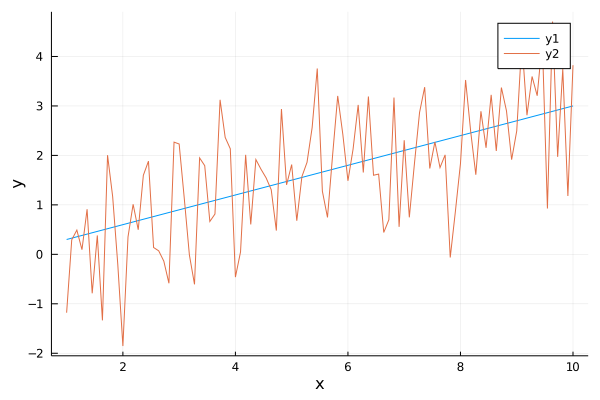

In [1]:
using Plots; gr() #Juliaの描画ライブラリであるPlotsを読み込む

plot(x, y) #最初のプロット
plot!(x, y_noise) #上書きをするには!を付ける
xaxis!("x")
yaxis!("y")